In [1]:
import pandas as pd

df = pd.read_csv('data/homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


### 1. Match the following characteristics of this dataset: 
- total number of actions
- number of unique users
- sizes of the control and experiment groups (i.e., the number of unique users in each group)

In [2]:
# total number of actions
df.shape[0]

8188

In [6]:
# number of unique users
df.id.unique().shape[0]

6328

In [16]:
# size of control group and experiment group
df[df.group == "control"].id.unique().shape[0], df[df.group == "experiment"].id.unique().shape[0]

(3332, 2996)

### 2. How long was the experiment run for? 
Hint: the records in this dataset are ordered by timestamp in increasing order

In [20]:
# duration of this experiment
df.timestamp.min(), df.timestamp.max()

('2016-09-24 17:42:27.839496', '2017-01-18 10:24:08.629327')

### 3. What action types are recorded in this dataset?
(i.e., What are the unique values in the action column?)

In [21]:
# action types in this experiment
df.action.value_counts()

view     6328
click    1860
Name: action, dtype: int64

### 4. Why would we use click through rate instead of number of clicks to compare the performances of control and experiment pages?

Answer: 
* Number of clicks doesn't take into account different sizes of control and experiment groups

### 5. Define the click through rate (CTR) for this experiment.

Answer: 
* Total clicks divided by Total views

### 6. What are the null and alternative hypotheses?
Use $CTR_{old}$ and $CTR_{new}$ in your hypotheses.

$$H_0: $$
$$H_1: $$

* H0: CTRnew <= CTRold
* H1: CTRnew > CTRold

In [23]:
control_df = df.query('group == "control"')

In [29]:
control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()

In [30]:
control_ctr

0.2797118847539016

In [31]:
experiment_df = df.query('group == "experiment"')

In [32]:
experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

In [33]:
experiment_ctr

0.3097463284379172

In [34]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

In [35]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "click"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "click"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)

In [40]:
import matplotlib.pyplot as plt

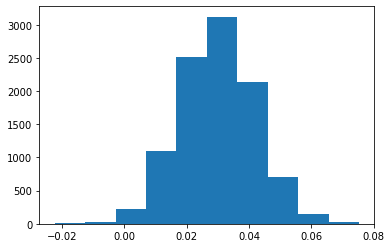

In [46]:
plt.hist(diffs);

In [43]:
import numpy as np

In [44]:
diffs = np.array(diffs)
null_vals = np.random.normal(0, diffs.std(), diffs.size)

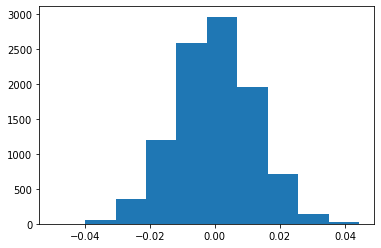

In [45]:
plt.hist(null_vals);

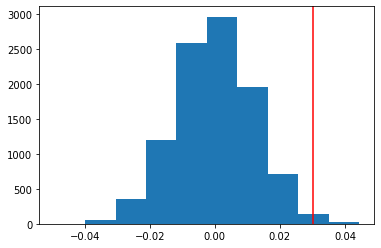

In [48]:
plt.hist(null_vals);
plt.axvline(x=obs_diff, color="red");

In [49]:
(null_vals > obs_diff).mean()

0.007